In [119]:
%load_ext autoreload
%autoreload 2
from utils import *
from feature_extraction import extract_features

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Harris Corner Detection [Feature]

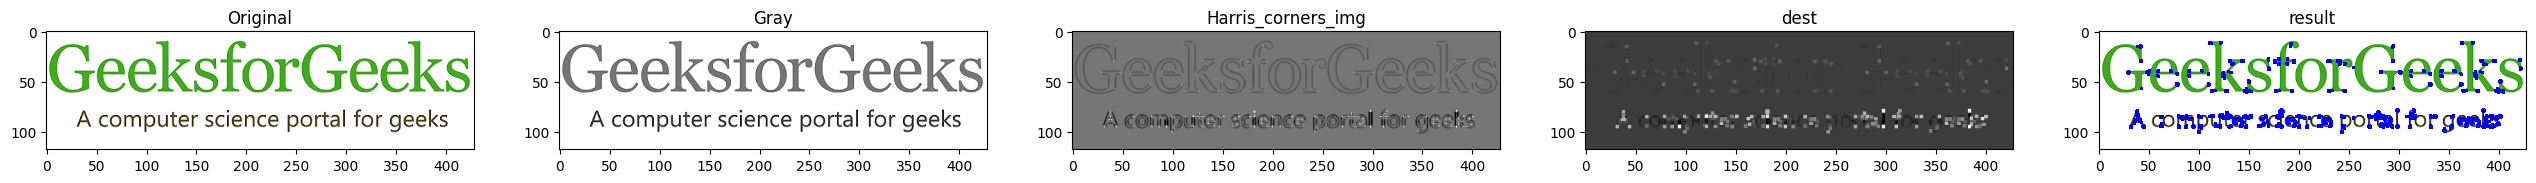

In [7]:
# Harris Corner Detection

# Read img
path='./Test Algorithms images/harris.png'
image = cv2.imread(path)

# grayscale color space
image_Gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# apply the cv2.cornerHarris method to detect the corners with appropriate values as input parameters
Harris_corners_img = cv2.cornerHarris(image_Gray, 2, 5, 0.07)

# Results are marked through the dilated corners
dest = cv2.dilate(Harris_corners_img, None)


# Threshold for an optimal value.
result=np.copy(image)
result[dest > 0.01 * dest.max()]=[0, 0, 255]

show_images([image,image_Gray,Harris_corners_img,dest,result],['Original','Gray','Harris_corners_img',"dest",'result'])

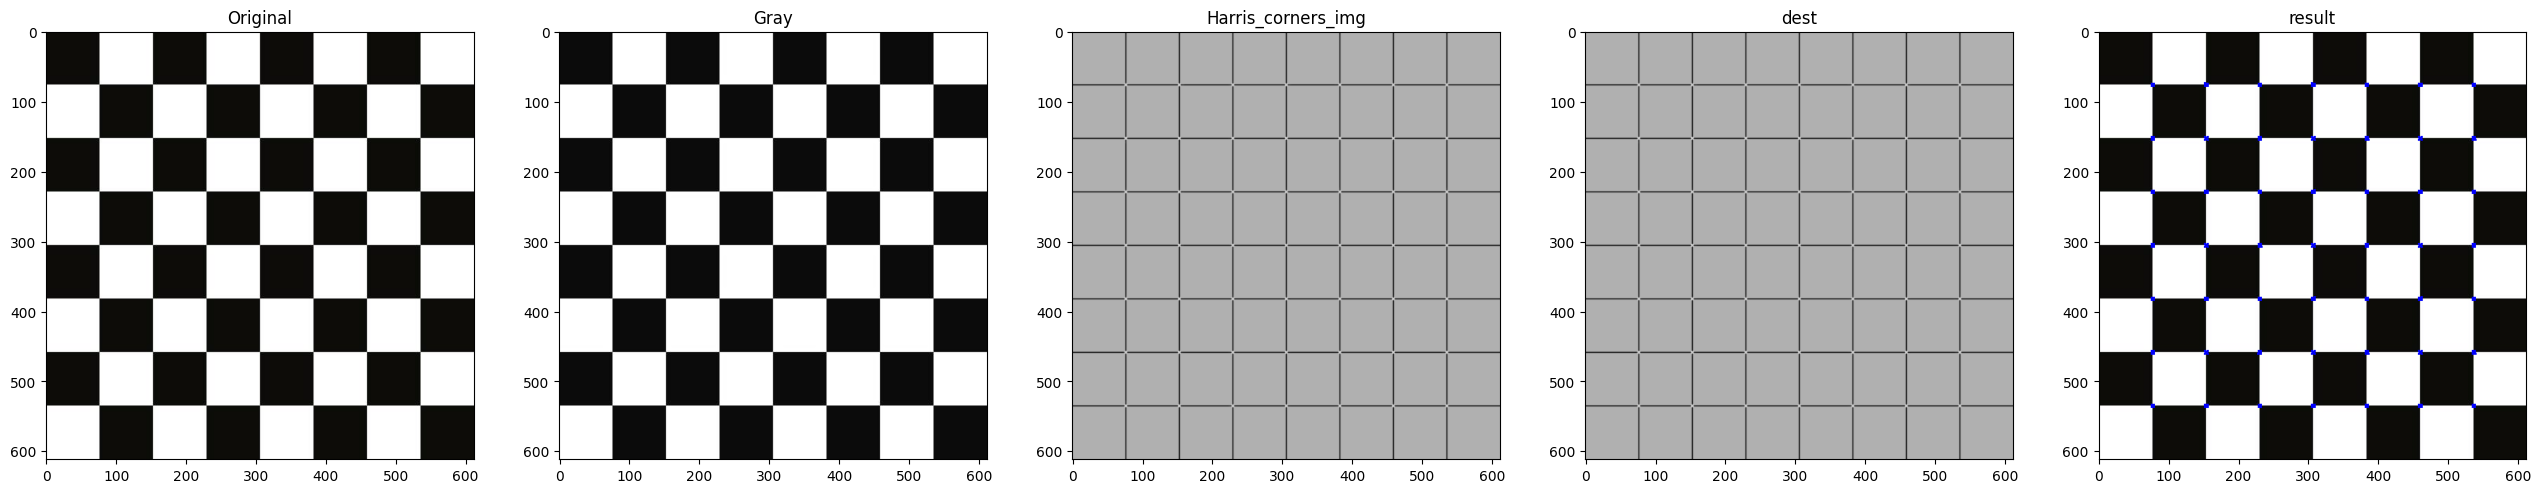

In [49]:

# Harris Corner Detection

# Read img
path='./Test Algorithms images/harris2.jpg'
image = cv2.imread(path)

# grayscale color space
image_Gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# apply the cv2.cornerHarris method to detect the corners with appropriate values as input parameters
Harris_corners_img = cv2.cornerHarris(image_Gray, 2, 5, 0.07)

# Dilation to remove lines while keeping corner
# image_dilate2 = cv2.dilate(image,np.ones((3,3),np.uint8))
Harris_corners_img_dilate = cv2.dilate(Harris_corners_img, None) #Same as the Line above


# Threshold for an optimal value.
result=np.copy(image)
result[Harris_corners_img_dilate > 0.01 * Harris_corners_img_dilate.max()]=[0, 0, 255]

show_images([image,image_Gray,Harris_corners_img,dest,result],['Original','Gray','Harris_corners_img',"dest",'result'])

### SIFT
###### is one of the important algorithms that detect objects irrelevant to the scale and rotation of the image and the reference

(391, 303)
(< cv2.KeyPoint 0000022F2FEF7E70>, < cv2.KeyPoint 0000022F312ADC50>, < cv2.KeyPoint 0000022F2F63FDE0>, < cv2.KeyPoint 0000022F2F63CC90>, < cv2.KeyPoint 0000022F2F63EE50>, < cv2.KeyPoint 0000022F2F63D290>, < cv2.KeyPoint 0000022F2F63C720>, < cv2.KeyPoint 0000022F2E057CC0>, < cv2.KeyPoint 0000022F2E056F70>, < cv2.KeyPoint 0000022F2E055EC0>, < cv2.KeyPoint 0000022F2E0576C0>, < cv2.KeyPoint 0000022F2E057F60>, < cv2.KeyPoint 0000022F2E057480>, < cv2.KeyPoint 0000022F2E057720>, < cv2.KeyPoint 0000022F2E055EF0>, < cv2.KeyPoint 0000022F2E057540>, < cv2.KeyPoint 0000022F2E055C20>, < cv2.KeyPoint 0000022F2E056760>, < cv2.KeyPoint 0000022F2E055F80>, < cv2.KeyPoint 0000022F2E0554A0>, < cv2.KeyPoint 0000022F2E056820>, < cv2.KeyPoint 0000022F2F5CF480>, < cv2.KeyPoint 0000022F2F5CDCB0>, < cv2.KeyPoint 0000022F2F5CF8D0>, < cv2.KeyPoint 0000022F2F5CCBD0>, < cv2.KeyPoint 0000022F2E3D8B70>, < cv2.KeyPoint 0000022F2E3DA220>, < cv2.KeyPoint 0000022F2E3D9F50>, < cv2.KeyPoint 0000022F2E3DB7E0>, < 

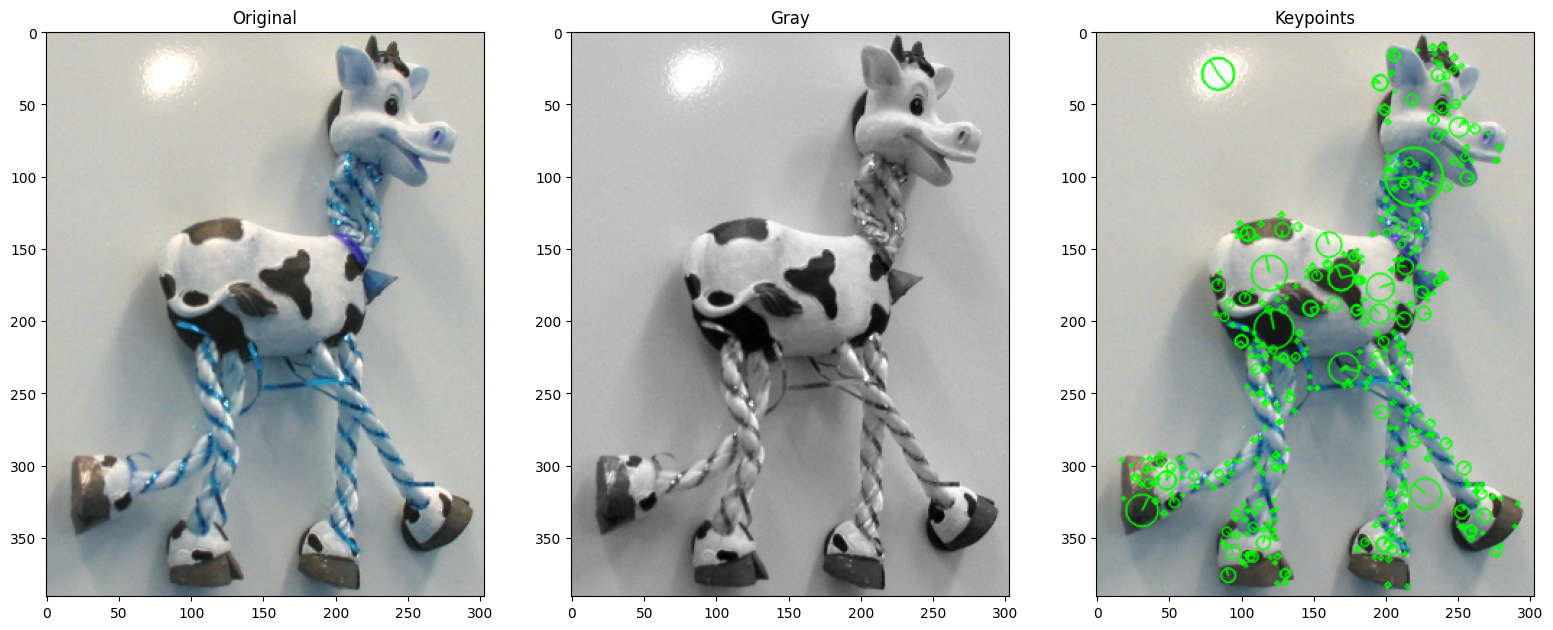

In [59]:
# SIFT
# Read img
path='./Test Algorithms images/SIFT1.png'
image = cv2.imread(path)

# grayscale color space
image_Gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(np.shape(image_Gray))

sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image_Gray, None)

if descriptors is None:
    print("No Key Points Detected")

print(keypoints)
print(np.shape(keypoints))# (456,)

print(descriptors)
print(np.shape(descriptors))#(456, 128)   we already have 456 key point for each key point we got 128 feature t describe it


# Draw KepPoints
kp_image = cv2.drawKeypoints(image, keypoints, None, color=(
    0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

show_images([image,image_Gray,kp_image],['Original','Gray','Keypoints'])


(397, 301)
(< cv2.KeyPoint 0000022F32BAFE10>, < cv2.KeyPoint 0000022F2E380630>, < cv2.KeyPoint 0000022F2E2BAB20>, < cv2.KeyPoint 0000022F2E2BAEB0>, < cv2.KeyPoint 0000022F2E2BB6C0>, < cv2.KeyPoint 0000022F2E2B9320>, < cv2.KeyPoint 0000022F2E2BA250>, < cv2.KeyPoint 0000022F2E2BA970>, < cv2.KeyPoint 0000022F2E2BA580>, < cv2.KeyPoint 0000022F2E2B91A0>, < cv2.KeyPoint 0000022F2E2B9DA0>, < cv2.KeyPoint 0000022F312AD530>, < cv2.KeyPoint 0000022F312AF9C0>, < cv2.KeyPoint 0000022F312AED00>, < cv2.KeyPoint 0000022F312AD650>, < cv2.KeyPoint 0000022F312AC690>, < cv2.KeyPoint 0000022F312AE760>, < cv2.KeyPoint 0000022F312AE4F0>, < cv2.KeyPoint 0000022F312ACA80>, < cv2.KeyPoint 0000022F312AF810>, < cv2.KeyPoint 0000022F312AF360>, < cv2.KeyPoint 0000022F312ACFF0>, < cv2.KeyPoint 0000022F2F63E160>, < cv2.KeyPoint 0000022F2F63CF60>, < cv2.KeyPoint 0000022F2F63D3B0>, < cv2.KeyPoint 0000022F2F63E970>, < cv2.KeyPoint 0000022F2F63F6C0>, < cv2.KeyPoint 0000022F2F63D1D0>, < cv2.KeyPoint 0000022F2F63D410>, < 

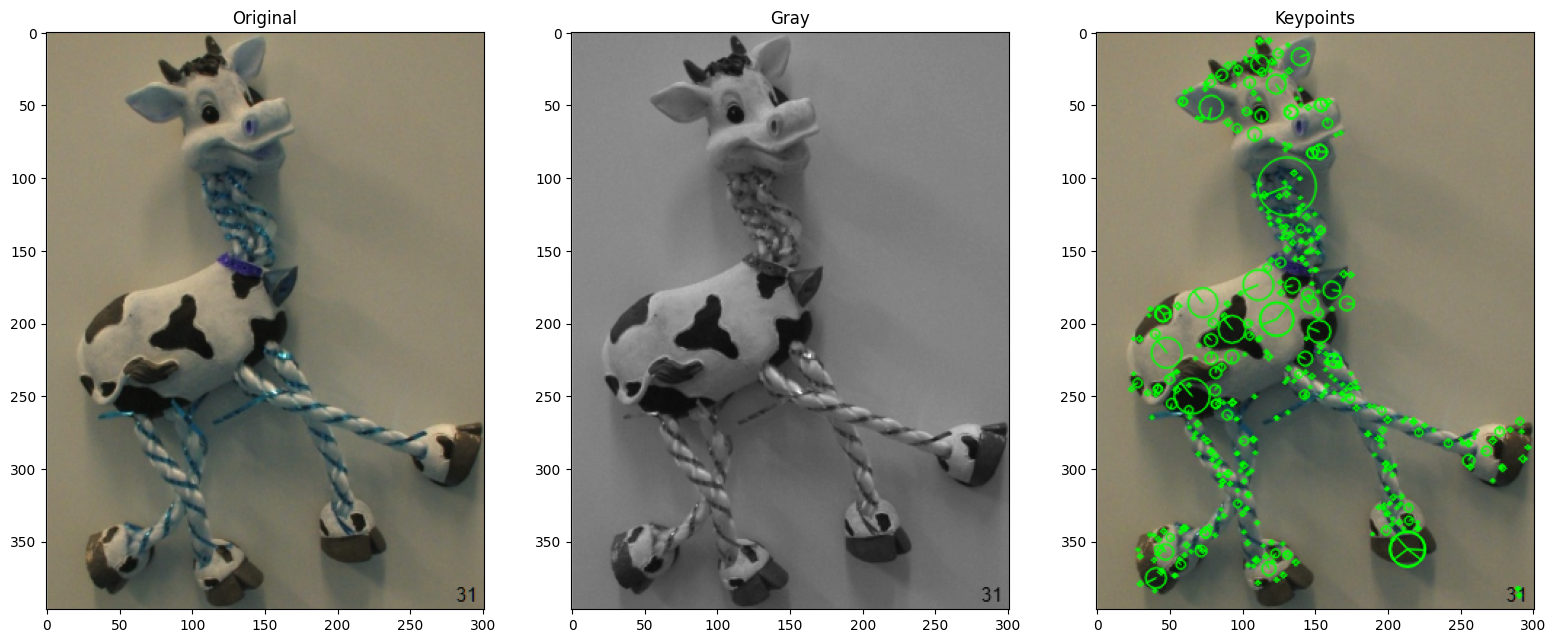

In [57]:
# SIFT
# Read img
path='./Test Algorithms images/SIFT2.png'
image = cv2.imread(path)

# grayscale color space
image_Gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(np.shape(image_Gray))


sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image_Gray, None) #Don't forget to Normalize to be invariant to scale and orientation

if descriptors is None:
    print("No Key Points Detected")

print(keypoints) #keypoints=interest points
print(np.shape(keypoints))# (456,)

print(descriptors) #descriptor=feature descriptions for an interest point
print(np.shape(descriptors))#(456, 128)   we already have 456 key point for each key point we got 128 feature t describe it



# Draw KepPoints
kp_image = cv2.drawKeypoints(image, keypoints, None, color=(
    0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

show_images([image,image_Gray,kp_image],['Original','Gray','Keypoints'])

#### Note We need to Normalize Sift Features
###### in order to make invariant to changes in scale and orientation.

In [142]:
from sklearn.preprocessing import StandardScaler
# Normalize descriptors  *************************************************
# SIFT descriptors are often normalized to unit length in order to make them invariant to changes in scale and orientation. 
# Normalize the descriptors to have zero mean and unit variance
# print(descriptors)
scaler = StandardScaler()#StandardScaler removes the mean and scales each feature/variable to unit variance.
train_sift_norm = scaler.fit_transform(descriptors)
# print(descriptors)
# print(np.shape(descriptors)) #(456, 128)

# print(train_sift_norm)
# print(np.shape(train_sift_norm)) #(456, 128)


[[104. 135.   0. ...   1.   3.   3.]
 [ 46.   0.   0. ...   0.   5.  31.]
 [  2.   3.  30. ...  64. 133.  57.]
 ...
 [  0.  10.  51. ...   0.   0.   2.]
 [  2.   4.   4. ...   0.   0.   3.]
 [  0. 156.  86. ...   0.   0.   1.]]
(456, 128)
[[ 3.2934685   3.1088765  -0.683484   ... -0.40531504 -0.30290416
  -0.42338803]
 [ 1.0857469  -0.6393841  -0.683484   ... -0.4546145  -0.19978784
   0.7241005 ]
 [-0.5890763  -0.5560894   0.14741099 ...  2.7005506   6.399656
   1.7896255 ]
 ...
 [-0.66520464 -0.36173517  0.7290375  ... -0.4546145  -0.4575786
  -0.46436977]
 [-0.5890763  -0.52832454 -0.572698   ... -0.4546145  -0.4575786
  -0.42338803]
 [-0.66520464  3.6919394   1.698415   ... -0.4546145  -0.4575786
  -0.5053515 ]]
(456, 128)


### Bag of Visual Words(BoVW)
##### SIFT TO SVM 

In [135]:
# takes all images and convert them to grayscale. 
# return a dictionary that holds all images category by category. 
def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        category = []
        path = folder + "/" + filename
        for cat in os.listdir(path):
            img = cv2.imread(path + "/" + cat,0)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            if img is not None:
                category.append(img)
        images[filename] = category
    return images



images=load_images_from_folder('D:\Hand-Gesture-Recognition\src/test_data')
# Dictionary of 0 Category 1 ...
print(np.shape(images['0']))


(2, 2592, 4608)


In [136]:

sift_vectors = {} #Ditionary {'M0':[[keptsofimg1*128],[keptsofimg2*128],[keptsofimg3*128]..]}
descriptor_list = [] #Total number of keypoints for all data set images * 128
sift = cv2.SIFT_create()
for key,value in images.items():
    print(key)#M0 M1..
    # Loop over Dictionary items value by value M0 M1 M2
    features = []
    for img in value:
        # Every image in the category we are in
        kp, des = sift.detectAndCompute(img,None)
        
        
        descriptor_list.extend(des)
        features.append(des)
    sift_vectors[key] = features
# Sift Vector -> Dictionary every key is class and its value is descriptor(128) for the all data set of this class

0
0 copy


In [114]:
print(np.shape(descriptor_list))
# print(sift_vectors['0'])# 128* all the key points of the class 0 all images

print(np.shape(sift_vectors['0'][0]))
print(np.shape(sift_vectors['0'][1]))

print(np.shape(sift_vectors['0 copy'][0]))
print(np.shape(sift_vectors['0 copy'][1]))

print(np.shape(sift_vectors['0'][0])[0]+np.shape(sift_vectors['0'][1])[0]+np.shape(sift_vectors['0 copy'][0])[0]+np.shape(sift_vectors['0 copy'][1])[0])


(2328, 128)
(299, 128)
(1174, 128)
(283, 128)
(572, 128)
2328


In [137]:
# of cluster(k) and the other is descriptors list(unordered 1d array)
# Returns an array that holds central points.
def kmeans(k, descriptor_list):
    kmeans = KMeans(n_clusters = k, n_init=10)
    kmeans.fit(descriptor_list)
    visual_words = kmeans.cluster_centers_ 
    return visual_words

# Takes the central points which is visual words    
visual_words = kmeans(10, descriptor_list) 
# print(np.shape(visual_words)) #(10, 128)

In [134]:
# Ex with 4 and 2data points we need to get nearest centriod index
ind,count_clusters=findClosestCentroids(X=np.array([[1,1],[100,100],[200,200]]),centroids=np.array([[1,1],[500,500],[70,70],[500,540]]))
print(ind)
print(count_clusters)

[[0]
 [2]
 [2]]
[[1.]
 [0.]
 [2.]
 [0.]]


In [139]:

# Returns a dictionary that holds the histograms for each images that are separated class by class. 
def image_class(all_bovw, centers):
    dict_feature = {}
    for key,value in all_bovw.items():
        # Each Category
        category = []
        for img in value:
            #Each Image in Category 
            ind,histogram=findClosestCentroids(X=img,centroids=centers)
            category.append(histogram) #Add this histogram to this Category
        dict_feature[key] = category
    return dict_feature
bovw_train = image_class(sift_vectors, visual_words) 
print(bovw_train['0'])  #'0':[k*1]-[k*1]  '1':[k*1]-[k*2]
# Here We have Achieved Feature Vector size k :D

[array([[ 8.],
       [28.],
       [63.],
       [18.],
       [15.],
       [53.],
       [14.],
       [37.],
       [47.],
       [16.]]), array([[224.],
       [152.],
       [ 43.],
       [ 61.],
       [155.],
       [ 80.],
       [211.],
       [ 97.],
       [ 38.],
       [113.]])]
